# CYCLIST BIKE SHARING COMPANY

## Business Understanding

### Problem Statement

You are a junior data analyst working on the marketing analyst team at Cyclistic, a bike-share
company in Chicago. The director of marketing believes the company’s future success
depends on maximizing the number of annual memberships. Therefore, your team wants to
understand how casual riders and annual members use Cyclistic bikes differently. From these
insights, your team will design a new marketing strategy to convert casual riders into annual
members. But first, Cyclistic executives must approve your recommendations, so they must be
backed up with compelling data insights and professional data visualizations.

### Objectives

In this project, we are interested in finding answers to the following questions:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?


## Data Understanding & Preparations

Since we are dealing with annual data, we need to merge the monthly spreadsheets to one dataset to provide insights of the annual data.

In [1]:
# Importing necessary modules and packages

# For data analysis and manipulation
import pandas as pd
import numpy as np 

# For plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Display plots in the notebook
%matplotlib inline

# Filter warnings
import warnings 
warnings.filterwarnings("ignore")


In [2]:
# Loading and merging the csv files
Jan = pd.read_csv("Data/2021_01.csv")
Feb = pd.read_csv("Data/2021_02.csv")
Mar = pd.read_csv("Data/2021_03.csv")
Apr = pd.read_csv("Data/2021_04.csv")
May = pd.read_csv("Data/2021_05.csv")
Jun = pd.read_csv("Data/2021_06.csv")
Jul = pd.read_csv("Data/2021_07.csv")
Aug = pd.read_csv("Data/2021_08.csv")
Sep = pd.read_csv("Data/2021_09.csv")
Oct = pd.read_csv("Data/2021_10.csv")
Nov = pd.read_csv("Data/2021_11.csv")
Dec = pd.read_csv("Data/2021_12.csv")

bike_trip_df = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec], ignore_index=True)

In [3]:
bike_trip_df.shape

(5595063, 13)

In [4]:
# Stats of the newly-formed dataset
bike_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 554.9+ MB


## Data Cleaning

We need to check for missing values and duplicates first, then use the appropriate functions to deal with them if there are any.

In [5]:
bike_trip_df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
dtype: int64

Due to the huge number of missing values, we have to delete the rows with missing values

In [6]:
bike_trip_df = bike_trip_df.dropna()

In [7]:
# Examine the new data
bike_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4588302 entries, 9 to 5595062
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 490.1+ MB


In [8]:
# Check null values
bike_trip_df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

There are no null values. So we check for duplicates.

In [9]:
bike_trip_df[bike_trip_df.duplicated()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


There are no duplicates as well. Now we can explore the new dataset.

We split the `started_at` column to get the day of the week, date, month and year.

In [10]:
bike_trip_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual


In [11]:
bike_trip_df['started_at'] = pd.to_datetime(bike_trip_df['started_at'])
bike_trip_df['ended_at'] = pd.to_datetime(bike_trip_df['ended_at'])

bike_trip_df['day_of_week'] = bike_trip_df['started_at'].dt.day_name()
bike_trip_df['date'] = bike_trip_df['started_at'].dt.date
bike_trip_df['month'] = bike_trip_df['started_at'].dt.month_name()
bike_trip_df['year'] = bike_trip_df['started_at'].dt.year
bike_trip_df['day'] = bike_trip_df['started_at'].dt.day

bike_trip_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,date,month,year,day
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member,Sunday,2021-01-24,January,2021,24
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member,Saturday,2021-01-23,January,2021,23
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual,Saturday,2021-01-09,January,2021,9
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual,Saturday,2021-01-09,January,2021,9
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual,Sunday,2021-01-24,January,2021,24


We then create `ride_length` column to determine how long riders use the bikes

In [12]:
bike_trip_df['ride_length (min)'] = ((bike_trip_df['ended_at'] - bike_trip_df['started_at']).dt.total_seconds() / 60).round()

In [13]:
bike_trip_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,date,month,year,day,ride_length (min)
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member,Sunday,2021-01-24,January,2021,24,7.0
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member,Saturday,2021-01-23,January,2021,23,5.0
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual,Saturday,2021-01-09,January,2021,9,10.0
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual,Saturday,2021-01-09,January,2021,9,9.0
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual,Sunday,2021-01-24,January,2021,24,10.0


We have to get rid of the rows with ride_length that are 0min and below

In [14]:
bike_trip_df_v2 = bike_trip_df[bike_trip_df['ride_length (min)'] > 0]

## Data Visualization

Visualization helps interpret and create insights on our dataset.

We first need to know the number of casual and member riders.

In [15]:
bike_trip_df_v2.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'day_of_week', 'date', 'month', 'year', 'day',
       'ride_length (min)'],
      dtype='object')

In [16]:
bike_trip_df_v2["member_casual"].value_counts()

member_casual
member    2514332
casual    2036646
Name: count, dtype: int64

There are more members (2514332) than casual riders (2036646)

We then create a percentage output to show the ratio amongst the rider type

In [17]:
bike_trip_df_v2["member_casual"].value_counts(normalize=True) * 100

member_casual
member    55.248169
casual    44.751831
Name: proportion, dtype: float64

Members occupy 55.25% as compared to the casual 44.75%

We then plot the rider types

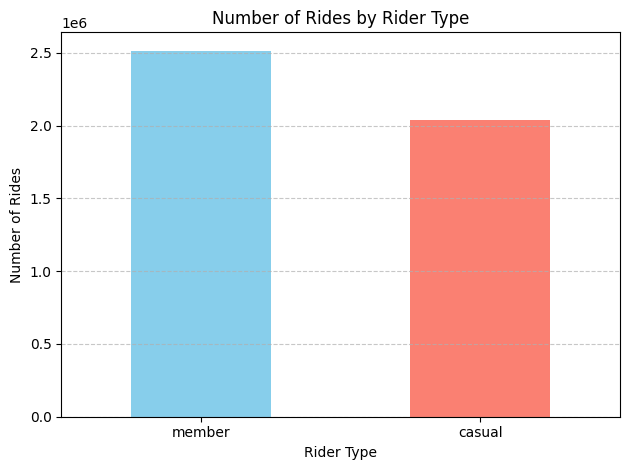

In [18]:
rider_type_total = bike_trip_df_v2["member_casual"].value_counts()
rider_type_total.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Number of Rides by Rider Type')
plt.xlabel('Rider Type')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We then plot the average `ride_length(min)` grouped by `member casual`

In [19]:
# Make sure ride_length is numeric
bike_trip_df_v2['ride_length (min)'] = pd.to_numeric(bike_trip_df_v2['ride_length (min)'], errors='coerce')

# Group and compute average ride length
rider_type_average_duration = bike_trip_df_v2.groupby('member_casual')['ride_length (min)'].mean().reset_index()

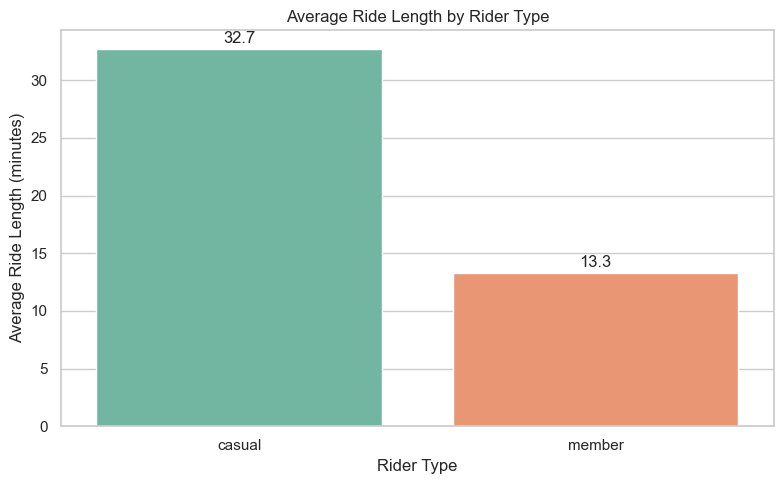

In [20]:
sns.set(style='whitegrid')

# Plot
plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    data=rider_type_average_duration,
    x='member_casual',
    y='ride_length (min)',
    palette='Set2'
)

# Add text labels
for index, row in rider_type_average_duration.iterrows():
    plt.text(x=index, y=row['ride_length (min)'] + 0.5, s=f"{row['ride_length (min)']:.1f}", ha='center')

# Labels and title
plt.title('Average Ride Length by Rider Type')
plt.xlabel('Rider Type')
plt.ylabel('Average Ride Length (minutes)')
plt.tight_layout()
plt.show()

The average ride length in minutes for casual riders is higher (32.7 min) as compared to the member riders (13.3 min)

We then check the average ride length based on the day of the week grouped by the rider type

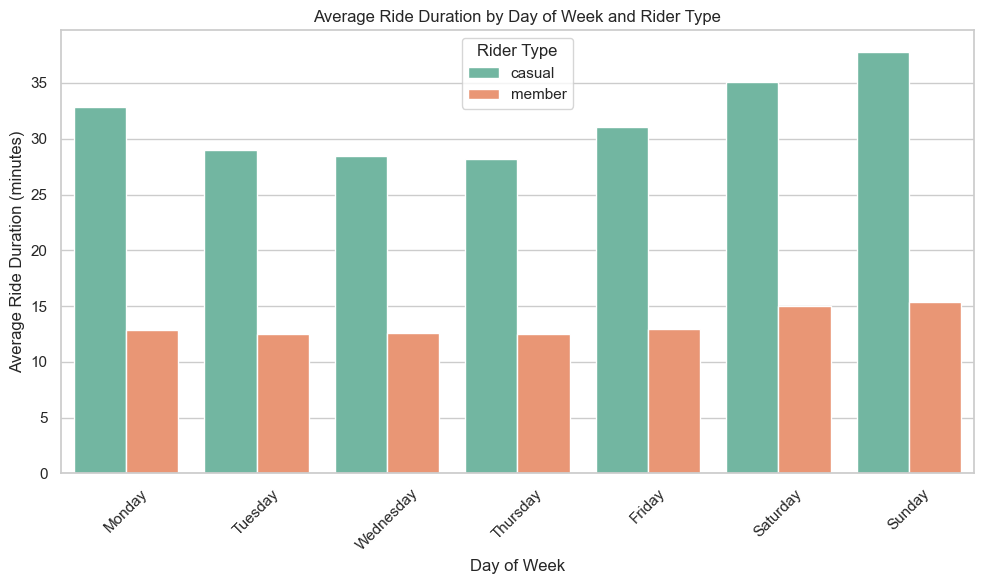

In [21]:
grouped_data = (
    bike_trip_df_v2
    .groupby(['member_casual', 'day_of_week'])
    .agg(
        number_of_rides=('ride_length (min)', 'count'),
        average_duration=('ride_length (min)', 'mean')
    )
    .reset_index()
)

# Ensuring days are in proper order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped_data['day_of_week'] = pd.Categorical(grouped_data['day_of_week'], categories=days_order, ordered=True)
grouped_data = grouped_data.sort_values(['member_casual', 'day_of_week'])

# Set style
sns.set(style='whitegrid')

# Create grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped_data,
    x='day_of_week',
    y='average_duration',
    hue='member_casual',
    palette='Set2'
)

# Customize labels and title
plt.title('Average Ride Duration by Day of Week and Rider Type')
plt.xlabel('Day of Week')
plt.ylabel('Average Ride Duration (minutes)')
plt.xticks(rotation=45)
plt.legend(title='Rider Type')
plt.tight_layout()
plt.show()

It turns out that riders use the bikes more on weekends (especially Sundays) and use the bikes least on Wednesday.

We can check the number of trips for each day grouped by rider type

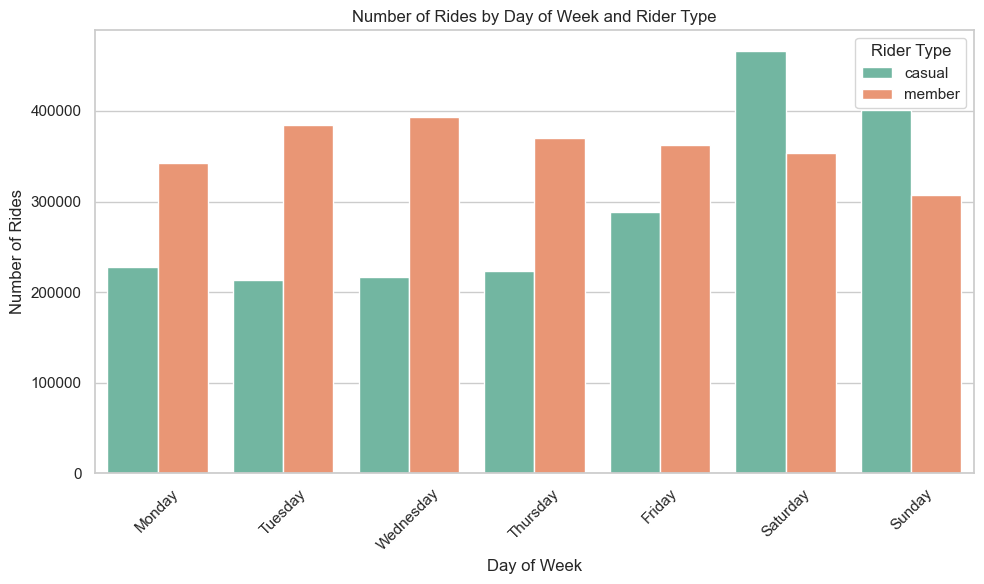

In [22]:
# Group and summarize number of rides
grouped_rides = (
    bike_trip_df_v2
    .groupby(['member_casual', 'day_of_week'])
    .agg(number_of_rides=('ride_length (min)', 'count'))
    .reset_index()
)

# Ensuring day_of_week is in logical order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped_rides['day_of_week'] = pd.Categorical(grouped_rides['day_of_week'], categories=days_order, ordered=True)
grouped_rides = grouped_rides.sort_values(['member_casual', 'day_of_week'])

# Set style
sns.set(style='whitegrid')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped_rides,
    x='day_of_week',
    y='number_of_rides',
    hue='member_casual',
    palette='Set2'
)

# Customize plot
plt.title('Number of Rides by Day of Week and Rider Type')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.legend(title='Rider Type')
plt.tight_layout()
plt.show()

In terms of the number of trips, casuals take the most trips on Sundays while members take the most trips on Wednesday.

We can also visualize the average trip durations and the number of trips according to months based on rider type.

In [23]:
bike_trip_df_v2 = bike_trip_df_v2.dropna(subset=['ride_length (min)'])

In [24]:
bike_trip_df_v2['month']

9           January
10          January
11          January
12          January
13          January
             ...   
5595051    December
5595055    December
5595059    December
5595060    December
5595062    December
Name: month, Length: 4550978, dtype: object

In [25]:
# Create ordered month column
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
bike_trip_df_v2['month'] = pd.Categorical(bike_trip_df_v2['month'], 
                                          categories=month_order, 
                                          ordered=True)

# Group by and summarize data
summary = bike_trip_df_v2.groupby(['member_casual', 'month']).agg(
    number_of_rides=('ride_length (min)', 'count'),
    average_duration=('ride_length (min)', 'mean')
).reset_index().sort_values(['member_casual', 'month'])

fig1 = px.bar(
    summary,
    x='month',
    y='average_duration',
    facet_col='member_casual',
    color='member_casual',
    title='Average Ride Duration by Month (Faceted by Membership Type)',
    labels={
        'average_duration': 'Average Duration',
        'month': 'Month',
        'member_casual': 'Member Type'
    }
)

# Add number of rides as text labels to each facet
fig1.for_each_trace(
    lambda trace: trace.update(
        text=summary.loc[summary['member_casual'] == trace.name, 'number_of_rides'],
        textposition='outside',
        textangle=-90,
        texttemplate='%{text:,}'
    )
)

fig1.update_layout(
    yaxis_title='Average Duration (minutes)',
    showlegend=False,
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

# Update facet titles
fig1.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig1.show()


The month of February recorded the highest average duration for both casuals and members.

# Conclusion

To answer the business questions:
1. How do annual members and casual riders use Cyclistic bikes differently?
There are a few differences between the groups include the average trip durations and number of trips on a weekly and yearly basis.
2. Why would casual riders buy Cyclistic annual memberships?
According to the charts, casual bike riders use the bikes more than the members and with that, it would be convenient for them in terms of bike usage.
3. How can Cyclistic use digital media to influence casual riders to become members?
A digital media campaign would focus on influencing casual riders into buying annual memberships while marketing the benefits of being a member including free passes.

# Recommendations

The 2 recommendations based on this analysis include:
1. Educate casual riders on the perks of memberships as a lack of knowledge can be the reason for the long usage by casual riders
2. A campaign to increase the usage by members especially in the less popular months could increase the number of trips. This campaign should provide benefits or rewards for continued usage with a focus on the less popular months.